# Phys 481 Fall 2021 Assignment 0: Cat map shuffle
### A.G. Swadling (30098501)
### E.J. Thompson (30087678)
### G.J. Gelinas (30085897)
### T.J. Cey (30088060)

In [13]:
# load libraries for numerical methods and plotting
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Introduction

This report investigates six questions relating to basic principles and ideas in python, such as differences between containers, implementing simple functions, the notion of reordering sets and randomness, the act of transforming images, and how to test the efficiency of functions. Further, we apply our techniques to the special case of determining the number of times Arnold's Cat Map must be applied to return an image to its original state.

## Questions

## Question 1:
Both lists and tuples can be used to store multiple data entries. They differ in that the entries of lists can be edited within the code after the list is created (that is lists are mutable), while the entries in tuples cannot be altered after initialization (which is to say tuples are immutable). They also differ in how they are identified in the code, where lists are contained with brackets [ ] and tuples are contained within parentheses ( ).

## Question 2:

The value from Wikipedia matched our calculated value for 52!, as is seen in the following code:

In [14]:
def factorial(N):
    """Calculates the factorial of an integer N greater than or equal to zero."""
    
    # Asserts that the input is a non-negative integer
    assert ((type(N) == int) & (N >= 0))
    
    # Recursively calls the factorial function or returns 1 if the base case of zero is reached
    if N == 0:
        return 1
    else:
        return N*factorial(N-1)

# Initializes wiki value
claim = 80658175170943878571660636856403766975289505440883277824000000000000    

# Prints whether or not the wikipedia value matches the calculated value
if (factorial(52) == claim):
    print("The wikipedia claim matches our calculated value.")
else:
    print("The wikipedia claim does not match our calculated value.")

The wikipedia claim matches our calculated value.


## Question 3:
### Overhand Assumptions

In designing this overhand shuffle function, it was assumed that the overhand shuffle consisted of taking blocks of fixed size off the top of a deck one at a time, and placing them in reverse order in a new stack, so the first block is at the bottom and the last is at the top, to reorder the cards. Some interpretations of the overhand shuffle are performed slightly differently, so in order for a precise definition of the function to be made, this specific technique described on the wiki https://en.wikipedia.org/wiki/Shuffling#Overhand_shuffle was chosen.

In [15]:
def overhand_shuffle(deck, blocksize = 8):
    """Shuffles a deck of cards by removing packets of size "blocksize"
    from the top of the deck and placing them on the top of a new second stack.
    
    Arguments:
    deck -- The deck to be shuffled
    blocksize -- The size of the packets used in the shuffle (default 8)
    
    Returns:
    shuffled_deck -- The deck after performing one overhand shuffle
    """
    
    # Initializes a list for the new stack
    shuffled_deck = []
    
    # While there are enough cards in the original stack to move a block, we move a block off the top to the new stack
    while len(deck) >= blocksize:
        # Places a block of length blocksize from the top of the original stack to the top of the new stack
        shuffled_deck.extend(deck[len(deck) - blocksize:len(deck)])
        
        # Deletes the top block of the original stack
        del deck[len(deck)-blocksize:len(deck)]
    
    # If there are cards left after moving the blocks, place them on the top of the new deck
    if len(deck) > 0:
        shuffled_deck.extend(deck[:])
    
    return shuffled_deck

In [16]:
# Initialize decks of cards for testing different block sizes
deck_list = [list( range(52) ) for i in range(5)]

# Shuffles the decks 21 times using specified block sizes ranging from 3 to 7
for i in range(21):
    for j in range(5):
        deck_list[j] = overhand_shuffle(deck_list[j], blocksize = j+3)
    
# Prints the shuffled decks along with the blocksize used
for i in range(5):
    print("Blocksize",str(i+3)+":",deck_list[i],"\n")

Blocksize 3: [49, 46, 51, 48, 43, 50, 45, 40, 47, 42, 37, 44, 39, 34, 41, 36, 31, 38, 33, 28, 35, 30, 25, 32, 27, 22, 29, 24, 19, 26, 21, 16, 23, 18, 13, 20, 15, 10, 17, 12, 7, 14, 9, 4, 11, 6, 1, 8, 3, 2, 5, 0] 

Blocksize 4: [48, 49, 50, 51, 44, 45, 46, 47, 40, 41, 42, 43, 36, 37, 38, 39, 32, 33, 34, 35, 28, 29, 30, 31, 24, 25, 26, 27, 20, 21, 22, 23, 16, 17, 18, 19, 12, 13, 14, 15, 8, 9, 10, 11, 4, 5, 6, 7, 0, 1, 2, 3] 

Blocksize 5: [46, 47, 49, 42, 50, 51, 43, 44, 45, 48, 37, 38, 39, 40, 41, 32, 33, 34, 35, 36, 27, 28, 29, 30, 31, 22, 23, 24, 25, 26, 17, 18, 19, 20, 21, 12, 13, 14, 15, 16, 7, 8, 1, 10, 11, 2, 5, 3, 4, 6, 9, 0] 

Blocksize 6: [50, 51, 42, 43, 46, 47, 36, 37, 48, 49, 40, 41, 30, 31, 44, 45, 34, 35, 24, 25, 38, 39, 28, 29, 18, 19, 32, 33, 22, 23, 12, 13, 26, 27, 16, 17, 6, 7, 20, 21, 10, 11, 0, 1, 14, 15, 2, 3, 4, 5, 8, 9] 

Blocksize 7: [47, 44, 31, 24, 51, 38, 39, 50, 37, 30, 17, 32, 45, 46, 43, 36, 23, 10, 25, 40, 49, 42, 29, 16, 3, 18, 33, 48, 35, 22, 9, 4, 11, 2

### Randomness Assessment:

It appears that randomness is not always achieved for the overhand shuffle, and depends quite drastically on the blocksize used. For instance with the blocksize of four, we have numbers grouped in ordered four-tuples, of adjacent size (for example 8,9,10,11). On the other hand, a blocksize of 7 appears to give a relatively random shuffling, with no very clear patterns being seen in the resulting deck.

## Question 4:

The following code tests the riffle_shuffle function given in the assignment to determine the randomness of its outputs:

In [6]:
#This cell contains code for the riffle shuffle function given in the assignment that was used in answering question 4

def riffle_shuffle(deck):
    """ This function changes the order of a sequence 
    by dividing it into two sections and merging them
    like shuffling a deck of cards.
    """
       
    ncards = len(deck)
    assert( (ncards %2) == 0 )  # must require an even number of cards
    #assert( ncards == 52 )     # don't require a full deck
    
    nhalf = ncards//2
    half0 = deck[0:nhalf]
    half1 = deck[nhalf:]
   
    result = []
    for indx in range( nhalf ):
        result.append( half0[indx] )
        result.append( half1[indx] )
        
    return result

In [8]:
# The purpose of the code in this cell is to analyze the randomness of the riffle_shuffle function

# Apply a sequence of 7 riffle shuffles.
deck = list( range(52) )
for indx in range(7):
    deck = riffle_shuffle(deck)
print(deck)

#The following two loops modify the one given in the assignment for 7 riffle shuffles to extend to greater than 7
# Apply a sequence of 8 riffle shuffles.
deck = list( range(52) )
for indx in range(8):
    deck = riffle_shuffle(deck)
print(deck)

# Apply a sequence of 9 riffle shuffles.
deck = list( range(52) )
for indx in range(9):
    deck = riffle_shuffle(deck)
print(deck)


[0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49, 51]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51]
[0, 26, 1, 27, 2, 28, 3, 29, 4, 30, 5, 31, 6, 32, 7, 33, 8, 34, 9, 35, 10, 36, 11, 37, 12, 38, 13, 39, 14, 40, 15, 41, 16, 42, 17, 43, 18, 44, 19, 45, 20, 46, 21, 47, 22, 48, 23, 49, 24, 50, 25, 51]


In using the function for a riffle shuffle given in the assignment, we have found that using the function "riffle_shuffle" at least 7 times does not effectively randomize the deck of cards. We are comfortable stating that the result is not sufficiently random because we were easily able to identify a pattern in the groupings. For 7 shuffles the deck began with all even numbered cards sorted in ascending order, followed by all odd numbered cards in ascending order. With 8 riffle shuffles, the deck is now back to the ordered state where all numbers appear in ascending order. With 9 riffle shuffles, the cards appear as they would after a single riffle shuffle.

However, if a human was to perform this shuffle we would expect the result to be more random than the computer generated result (even given the human started their shuffle with an ordered deck). This is because humans are imperfect, and when shuffling in reality, cards get stuck together and you do not get the perfect alternating movement from two halves of the deck into 1 uniform deck as is described in theory for this shuffle. Cards getting randomly stuck together will interrupt the patterns we found in the computer generated results, and increase the randomness of the deck in comparison to the computer shuffled deck after 7 human done riffle shuffles.

## Question 5

In this question we compare and contrast the efficiencies of the two cat map functions defined below:

image shape:  (354, 354, 3)


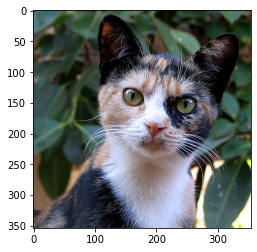

In [18]:
#This cell contains code given in the assignment for the catmap1 and catmap2 functions that was used in answering question 5

def catmap1(square):
    """Apply Arnold's cat map to a square NxN numpy array
    using loops to modify pixels one at a time.
    """
    
    nx,ny = square.shape[0:2]
    assert (nx == ny & ny > 1)  # require a square grid of at least 2x2=4 pixels
    
    result = square.copy()
    for x in range(nx):
        for y in range(ny):
            xx = x + y
            yy = x + 2*y
            result[x,y] = square[xx % nx, yy % ny]
            
    return result

def catmap2(square):
    """
    Apply Arnold's cat map to a square NxN numpy array 
    using array indexing.
    """
    
    nx,ny = square.shape[0:2]
    assert (nx == ny & ny > 1)
    
    x, y = np.arange(nx), np.arange(ny)
    xx, yy = np.meshgrid(x, y, sparse=False, indexing='ij')
    
    xx = xx + yy
    yy = yy + xx
    
    return square[xx % nx, yy % ny]   


# Use the python imaging library (PIL) package to read an image
# from a network URL.
#
from PIL import Image
import requests
from io import BytesIO

image_url = r"https://www.jasondavies.com/catmap/catmap.jpg"
response = requests.get(image_url)
img =  Image.open(BytesIO(response.content)) 

# Turn the PIL image into a numpy array.  
# Note the 3rd dimension corresponding to rgb color information.
#
data = np.array( img ) 
print('image shape: ', data.shape)
plt.imshow(data)

newdat = np.array( img )

In [19]:
#Work for Question 5

# Use timeit magic command to obtain average run times and standard deviations for the two catmap functions
%timeit catmap1(newdat)
%timeit catmap2(newdat)

86.3 ms ± 1.2 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
3.74 ms ± 22.5 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


As we can see from the above code, catmap1 took significantly more time to run than catmap2 each time the timeit function performed a loop. The timeit function was run multiple times with each run averaging about 80 ms for catmap1 and near 5 ms for catmap2. These are just rough averages, but due to the large discrepancy in mean run times as well as the fact that the standard deviation for catmap2 was consistently in the tens of micro seconds, while the standard deviation for catmap1 was mostly in the range of milliseconds, we can conclude that catmap2 is significantly more efficient than catmap1. This difference in efficiency comes from the fact that catmap1 uses a pair of nested loops and makes changes to a single pixel at a time, while catmap2 uses arrays and numpy array manipulations. The use of arrays meant that for each pixel a loop did not have to be cycled through, and thus the time was cut down significantly because efficiency was increased. To determine the efficiencies the jupyter magic command %timeit was used to compute the computation time as shown above. 

## Question 6:

In this question we analyze the number of applications of the cat map needed for a square array of size $N\times N$ to return to its original state, and we print, tabulate, and plot the results.

In [11]:
# The function "catmap" is taken from the assignment "phys481_week01_cat_shuffle-notes"
def catmap(square):
    """
    Apply Arnold's cat map to a square NxN numpy array 
    using array indexing.
    """
    
    nx,ny = square.shape[0:2]
    assert (nx == ny & ny > 1)
    
    x, y = np.arange(nx), np.arange(ny)
    xx, yy = np.meshgrid(x, y, sparse=False, indexing='ij')
    
    xx = xx + yy
    yy = yy + xx
    
    return square[xx % nx, yy % ny]

def how_long(N):
    """Finds the number of iterations required to map an NxN
    numpy array back onto itself using Arnold's cat map."""
    
    # Create an NxN array with unique entries
    square = np.array(np.arange(N*N)).reshape(N,N)
    
    # Create a new NxN array to compare to the original
    new_square = catmap(square)
    i = 1
    
    # Loop until a match between the arrays is found
    while True:
        # Test to see if the squares match
        if (np.array_equal(square, new_square)):
            break
            
        # Apply another cat mapping
        new_square = catmap(new_square)
        i += 1
    
    return i

# Prints the cycle lengths of the cat map for square nxn arrays from n = 2 to n = 20
for n in range(2,21):
    print(how_long(n), end = ", ")

3, 4, 3, 10, 12, 8, 6, 12, 30, 5, 12, 14, 24, 20, 12, 18, 12, 9, 30, 

|N |Iterations|
|--|----------|
|2 |3         |
|3 |4         |
|4 |3         |
|5 |10        |
|6 |12        |
|7 |8         |
|8 |6         |
|9 |12        |
|10|30        |
|11|5         |
|12|12        |
|13|14        |
|14|24        |
|15|20        |
|16|12        |
|17|18        |
|18|12        |
|19|9         |
|20|30        |


Text(0.5, 1.0, 'Iterations Required to Map a Matrix Back Onto Itself versus Matrix Size')

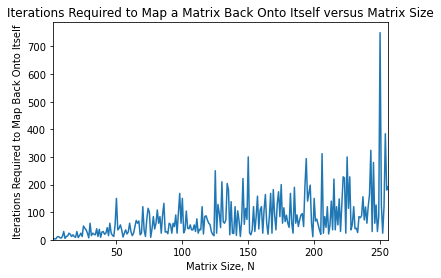

In [12]:
# Calculate the number of iterations of catmapping needed for each matrix size
# from 2 to 256 and store it in an array
iterations_array = np.empty([255])
for n in range(2, 257):
    iterations_array[n-2] = how_long(n)

# Plot the x and y axes
plt.plot(range(2, 257), iterations_array)

# Label the axes and set their limits
plt.xlabel("Matrix Size, N")
plt.ylabel("Iterations Required to Map Back Onto Itself")
plt.xlim(2, 256)
plt.ylim(0)

# Add a title
plt.title("Iterations Required to Map a Matrix Back Onto Itself versus Matrix Size")

## Conclusions/Summary

In this assignment we determined a few differences between the list and tuple container structures, created a function to output factorials for non-negative integers, analyzed the randomness of coded overhand and riffle shuffle functions for cards, and contrasted the efficiency of two versions of Arnold's Cat map. In the shuffling portion we determined that both methods of shuffling often led to decks which did not have a high degree of randomness, with clear patterns often being visible. For the cat maps, we determined that catmap2 was more than 25 times more efficient than catmap1 in computing the transformation of a fixed image. Finally, as a slightly more in depth study we calculated and plotted the cycle size of the cat map when applied to square matrices of varying sizes, and observed that on average the cycle size increased with matrix size, although there were exceptions with certain large matrices having quite low cycle sizes.